In [2]:
import pandas as pd
import numpy as np
from plotnine import *

# Task 1
Below is a plot of a visualization in Gapminder (the default/starting one actually). Look it over and take note of the variables being visualized.

![Task 1 Image](Task-1-Image.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.

For the year 2010:  
- X-axis: Income per person (GDP/capita, PPPS inflation-adjusted)  
- Y-axis: Life expectancy  
- Size: Population  
- Color: World Region  
- split by 4 income levels

2. Import the q1data.csv dataset.

In [3]:
q1 = pd.read_csv('Data/q1data.csv')
q1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


3. Recreate the plot as best you can using plotnine.

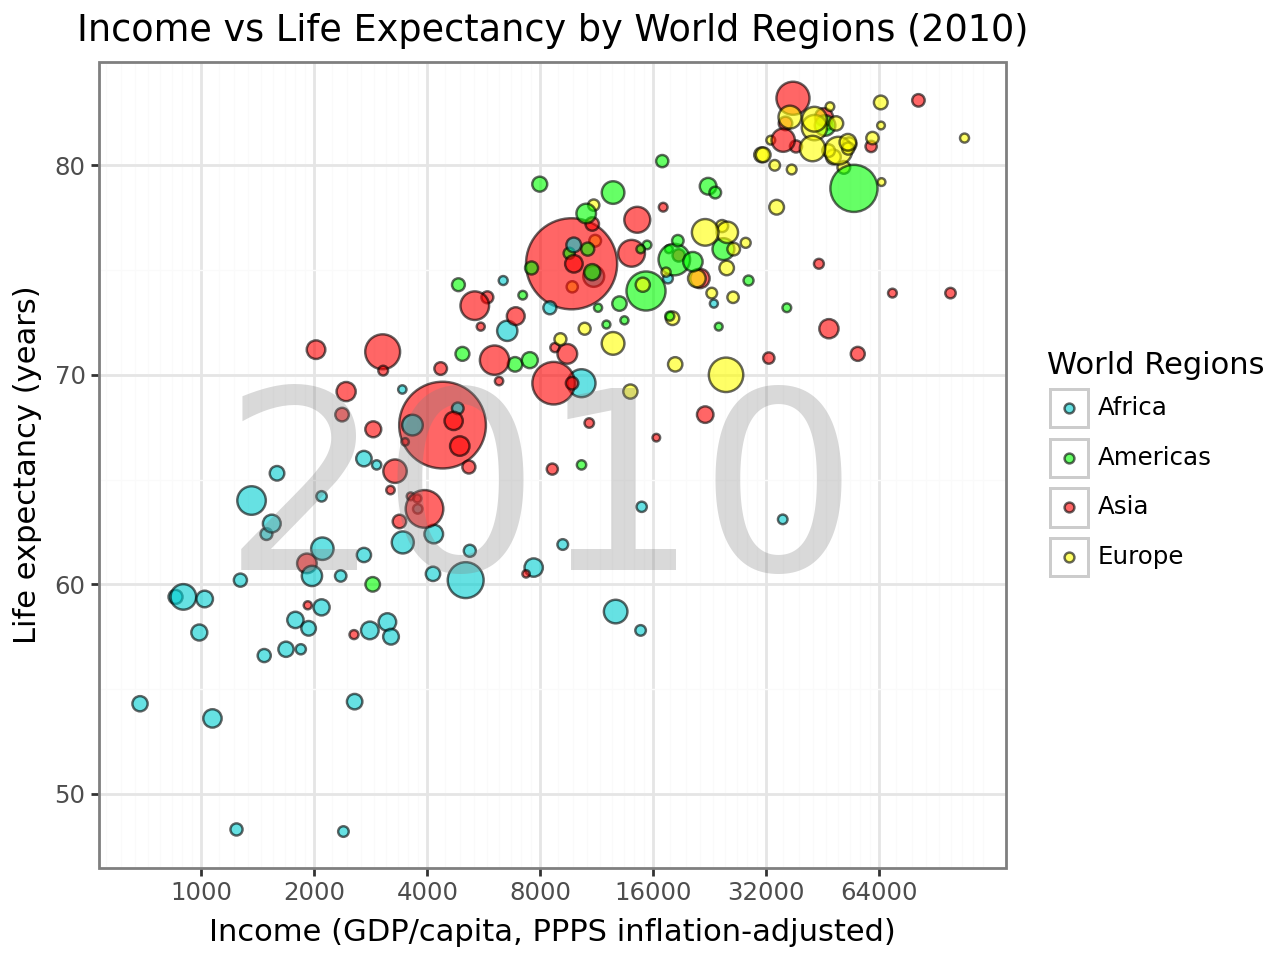

In [4]:
(ggplot(q1.dropna(), aes(x='income', y='life_exp', size='population', fill='four_regions')) +
    geom_point(alpha=0.6) + 
    theme_bw() +
    scale_size_continuous(range=[1, 18], guide=False) +
    labs(title = "Income vs Life Expectancy by World Regions (2010)",
        x = "Income (GDP/capita, PPPS inflation-adjusted)",
        y = "Life expectancy (years)", 
        fill = "World Regions") + 
    scale_x_log10(breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]) + 
    scale_y_continuous(breaks=range(20, 100, 10)) +
    annotate("text", x=8000, y=64, label="2010", size=90, color="grey", alpha=0.3, ha='center') + 
    scale_fill_manual(
        values={
            'africa': 'darkturquoise', 
            'americas': 'lime', 
            'asia': 'red', 
            'europe': 'yellow'
        },
        labels=['Africa', 'Americas', 'Asia', 'Europe']) +
    guides(size=False)
)

**Sources**:  
- Match x-axis scale to GapMinder scale: https://plotnine.org/reference/scale_x_log10.html  
- Making y-axis continuous: https://f0nzie.github.io/rmarkdown-python-plotnine/scales-and-zooming.html  
- Change theme to match white background: https://ggplot2.tidyverse.org/reference/ggtheme.html  
- Add text '2010' to plot: https://stackoverflow.com/questions/59024019/add-text-to-figure-using-pythons-plotnine  
- Change names on legend: https://stackoverflow.com/questions/71888153/changing-the-names-on-a-legend  
- Manually add legend colors: https://stackoverflow.com/questions/62159591/plotnines-scale-fill-and-axis-position  
- Remove 'population' legend: https://stackoverflow.com/questions/14604435/turning-off-some-legends-in-a-ggplot  
- Change size of points: https://plotnine.org/reference/scale_size_continuous.html  
- Overall reference: https://plotnine.org/reference/  

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

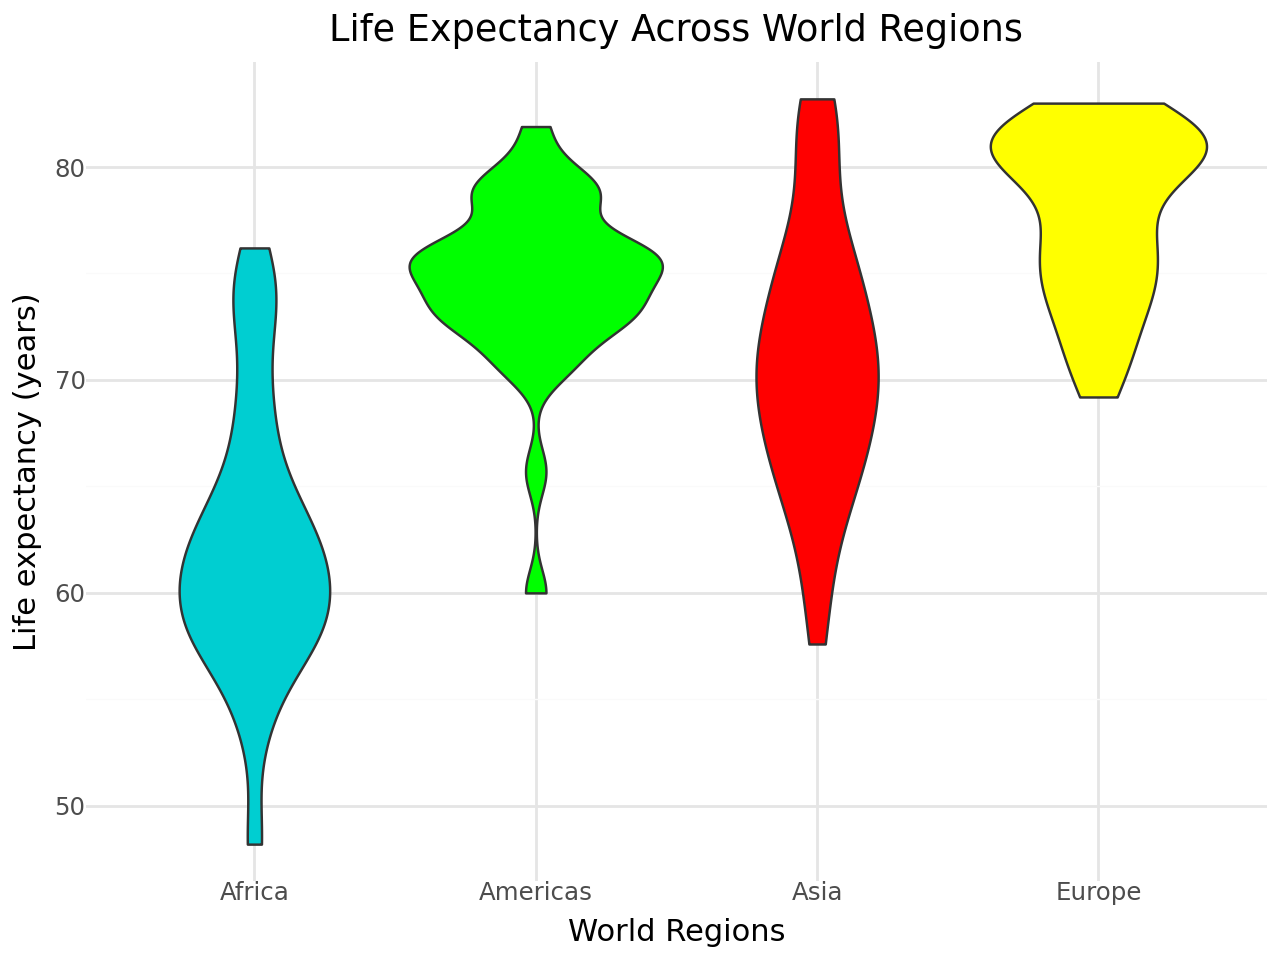

In [5]:
# Violin Plot
(ggplot(q1.dropna(), aes(x='four_regions', y='life_exp', fill='four_regions')) +
    geom_violin() +
    theme_minimal() +
    labs(title = "Life Expectancy Across World Regions",
        x = "World Regions", 
        y = "Life expectancy (years)", 
        fill = "World Regions") +
    scale_x_discrete(labels={'africa': 'Africa', 'americas': 'Americas', 'asia': 'Asia', 'europe': 'Europe'}) +
    scale_fill_manual(
        values={
            'africa': 'darkturquoise', 
            'americas': 'lime', 
            'asia': 'red', 
            'europe': 'yellow'
             }) +
     theme(legend_position='none'))

**Why plot is good**:  
- Clearly displays the spread and density of life expectancy for each region  
- Combines the features of a boxplot and kernal density estimate (shows summary statstics and distribution)  
- Easy to compare life expectancy of regions based on color and shape  
- Shows spread of data  

**Why plot is bad**:  
- Unlike a boxplot, doesn't show exact values like medians or quartiles, which would have been useful to summarize life expectancy  
- Doesn't show how population size varies between regions  
- Emphasizes shape and spread, not exact values  

# Task 2

Below is another plot of a visualization in Gapminder. Look it over and take note of the variables being visualized.

![Task 2 Image](Task-2-Image.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  

For the year 1997:  
- X-axis: Exports (\% of GDP)  
- Y-axis: Imports (\% of GDP)  
- Size: Energy use  
- Fill/Color: World Region  

2. Import the q2data.csv dataset.

In [6]:
q2 = pd.read_csv("Data/q2data.csv")

# Energy needs to be converted to numeric, but there are values ending in 'k' (example: 18.8k instead of 18800)
# Suggested by ChatGPT 4o: Check for 'k', remove it, and multiply by 1000
q2['energy'] = q2['energy'].apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in str(x) else x)
# Convert to numeric
q2['energy'] = pd.to_numeric(q2['energy'])

3. Recreate the plot as best you can using plotnine.

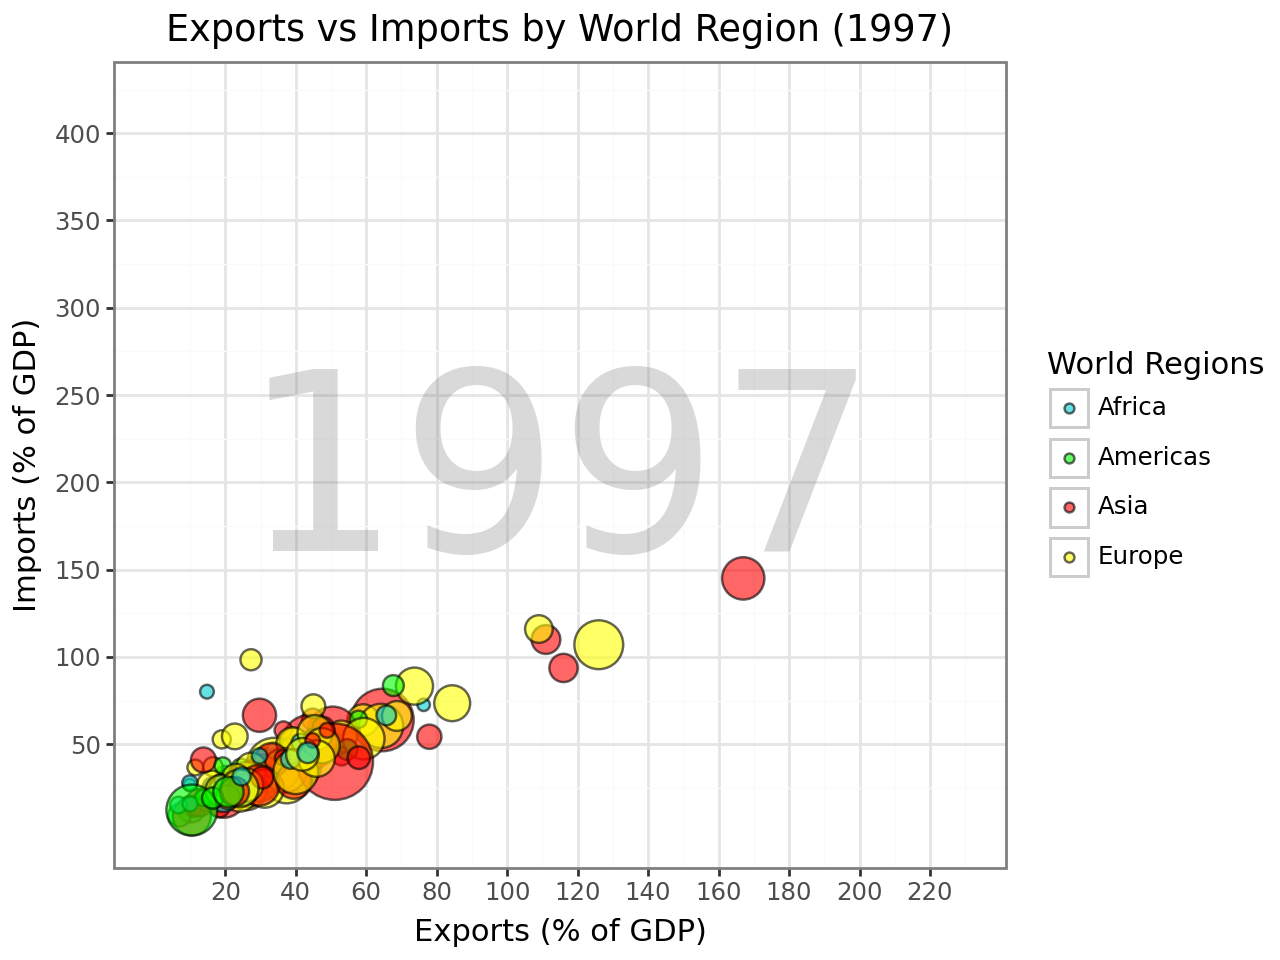

In [7]:
(ggplot(q2.dropna(), aes(x='exports', y='imports', size='energy', fill='four_regions')) +
    geom_point(alpha=0.6) + 
    theme_bw() +
    scale_size_continuous(range=[1, 15], guide=False) +
    scale_x_continuous(limits=(0, 230), breaks=range(20, 230, 20)) +
    scale_y_continuous(limits=(0, 420), breaks=range(50, 420, 50)) +
    labs(title = "Exports vs Imports by World Region (1997)",
        x = "Exports (% of GDP)", 
        y = "Imports (% of GDP)", 
        fill = "World Regions") + 
    annotate("text", x=115, y=200, label="1997", size=90, color="grey", alpha=0.3, ha='center') + 
    scale_fill_manual(
        values={
            'africa': 'darkturquoise', 
            'americas': 'lime', 
            'asia': 'red', 
            'europe': 'yellow'
        },
        labels=['Africa', 'Americas', 'Asia', 'Europe']) +
    guides(size=False)
)

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

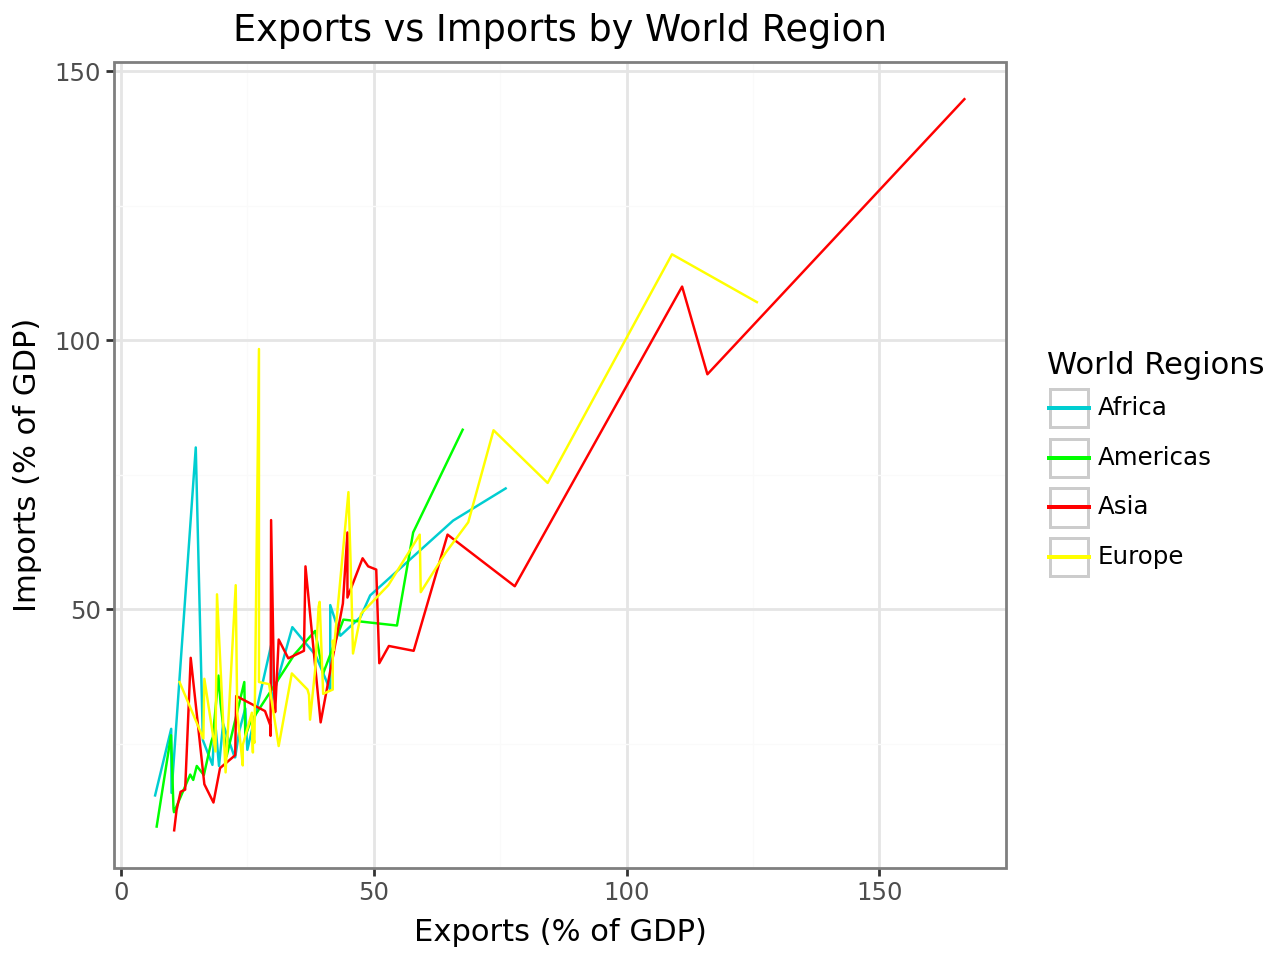

In [8]:
# Line plot
(ggplot(q2.dropna(), aes(x='exports', y='imports', color='four_regions')) +
    geom_line() +
    theme_bw() +
    labs(title = "Exports vs Imports by World Region",
        x="Exports (% of GDP)", 
        y="Imports (% of GDP)", 
        color="World Regions") + 
    scale_color_manual(
        values={
            'africa': 'darkturquoise', 
            'americas': 'lime', 
            'asia': 'red', 
            'europe': 'yellow'
        },
        labels=['Africa', 'Americas', 'Asia', 'Europe']) +
    guides(size=False))

**Why plot is good**:    
- Lines allow you to clearly see the trend between exports and imports for the different regions (In general, as exports go up, so do imports)  
- The different colors allow you to see which line corresponds to which region  
- Straight-forward and easy to comprehend  

**Why plot is bad**:  
- Lines overlap, especially in lower left corner, which make it hard to distinguish between the regions  
- Only shows lines, but no actual data points, so it’s hard to tell how many observations are contributing to each line or where the data points are concentrated  

# Task 3

![Task 3 Image](Task-3-Image.png)

1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.  

For the year 2001:  
- X-axis: Individuals using the Internet (% of population)  
- Y-axis: GDP/capita (US$, inflation-adjusted)  
- Size: Income  
- Fill/Color: World Region  

2. Import the q3data.csv dataset.

In [9]:
q3 = pd.read_csv("Data/q3data.csv")
q3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


3. Recreate the plot as best you can using plotnine.

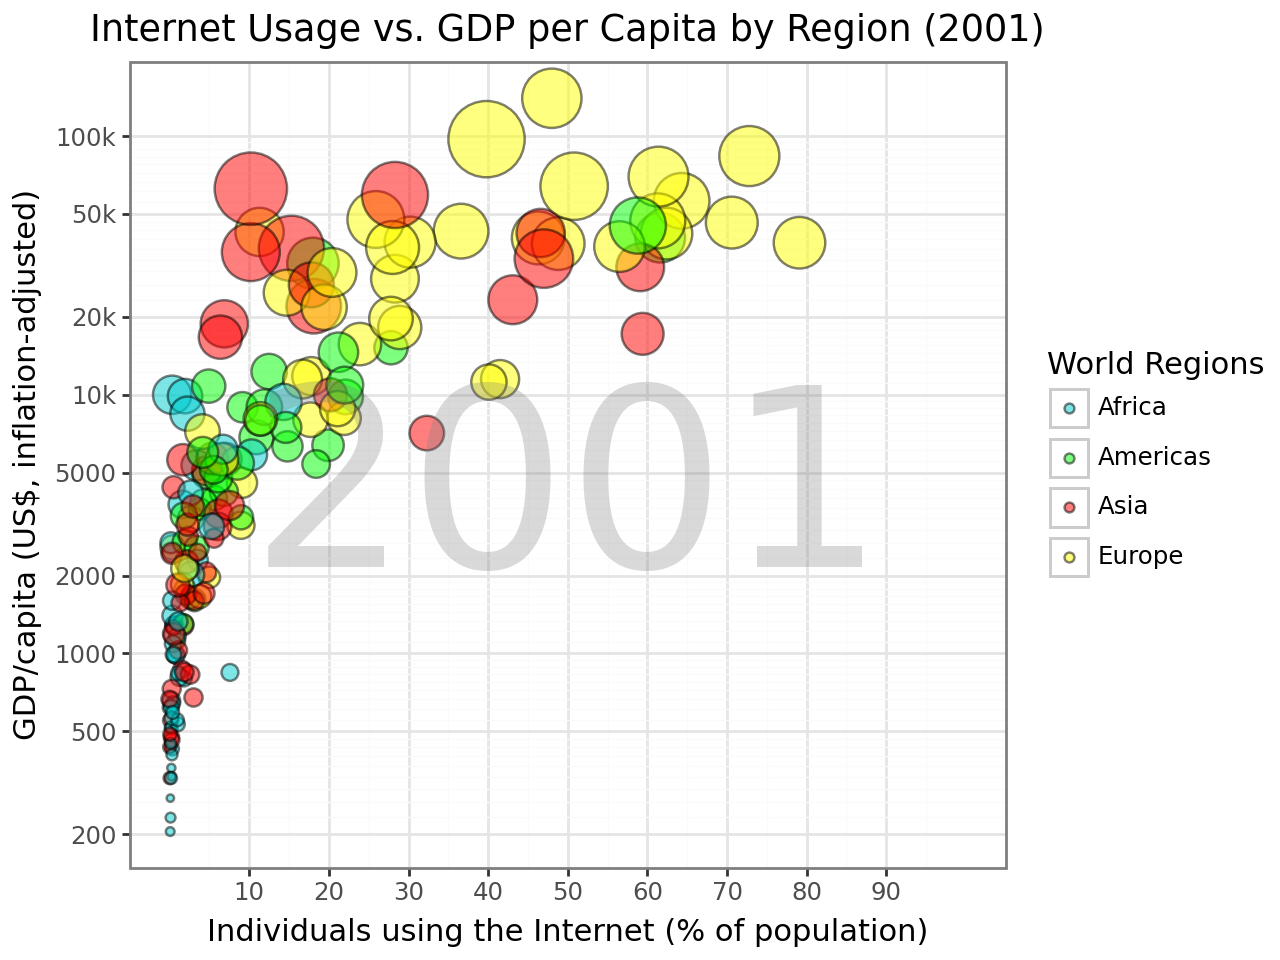

In [132]:
(ggplot(q3.dropna(), aes(x='internet_users', y='gdp', size='income', fill='four_regions')) +
    geom_point(alpha=0.6) +
    theme_bw() +
    scale_size_continuous(range=[1, 15], guide=False) +
    scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
    labels=["200", "500", "1000", "2000", "5000", "10k", "20k", "50k", "100k"]) +  # Log scale for the y-axis to match the GDP/capita scale
    scale_x_continuous(limits=(0, 100), breaks=range(10, 91, 10)) +  # Set x-axis limits to 0-100% for internet usage
    labs(title = "Internet Usage vs. GDP per Capita by Region (2001)", 
        x = "Individuals using the Internet (% of population)", 
        y = "GDP/capita (US$, inflation-adjusted)", 
        fill = "World Regions") +
    annotate("text", x=50, y=4000, label="2001", size=90, color="grey", alpha=0.3, ha='center') +
    scale_fill_manual(
        values={
         'africa': 'darkturquoise',
         'americas': 'lime',
         'asia': 'red',
         'europe': 'yellow'
     },
     labels=['Africa', 'Americas', 'Asia', 'Europe']) +
    guides(size=False))


**Source**:  
- Match y-axis scale to GapMinder scale: https://plotnine.org/reference/scale_y_log10.html#plotnine.scale_y_log10  

4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.

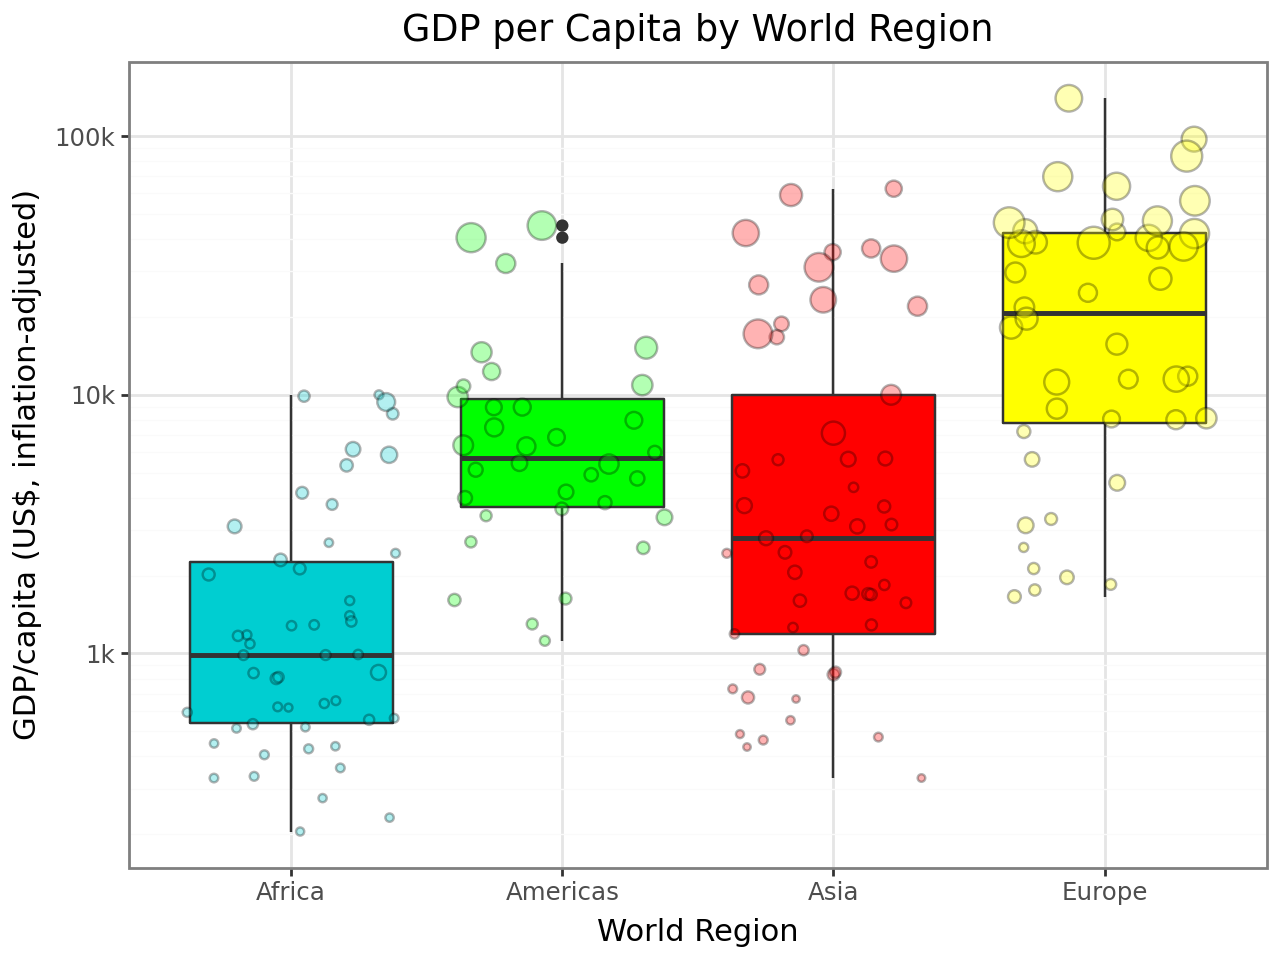

In [133]:
# Box plots
(ggplot(q3.dropna(), aes(x='four_regions', y='gdp', fill='four_regions')) +
     geom_boxplot() +
     geom_jitter(aes(size='internet_users'), color="black", alpha=0.3)  +
     theme_bw() +
     scale_y_log10(breaks=[100, 1000, 10000, 100000],  # Set the breaks at regular values
               labels=["100", "1k", "10k", "100k"]) +
     labs(title = "GDP per Capita by World Region",
          x = "World Region", 
          y = "GDP/capita (US$, inflation-adjusted)") +
     scale_x_discrete(labels={'africa': 'Africa', 'americas': 'Americas', 'asia': 'Asia', 'europe': 'Europe'})  +
     scale_fill_manual(
          values={
          'africa': 'darkturquoise',
          'americas': 'lime',
         'asia': 'red',
         'europe': 'yellow'
     }) +
     theme(legend_position='none'))

**Why plot is good**:    
- allows you to see both the overall distribution and the actual data points (boxplots summarize distribution of GDP across regions, jitrtered points show individual observatios)  
- The different colors helps differentiate between regions  

**Why plot is bad**:  
- In regions with many data points, jittered points overlap and make it harder to see the indivudal points in certain areas  
- jitter points could be distracting  
- boxplot whiskers may not effectively represent the distribution of data since y-axis is on a log scale  